In [20]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# EfficientNetB0 모델 로드 (ImageNet 데이터셋에 대해 사전 학습된 가중치 사용)
model = EfficientNetB0(weights='imagenet')


In [22]:
# 이미지 로드, 전처리
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [23]:
# 이미지 입력, 분류
def classify_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    preds = model.predict(img_array)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    return decode_predictions(preds, top=3)[0]

In [24]:
# 이미지 경로
img_path = 'data/_test_9.png'

In [25]:
# 이미지 분류
results = classify_image(img_path)

1/1 [==============================] - 1s 1s/step
Predicted: [('n03710721', 'maillot', 0.13968103), ('n02071294', 'killer_whale', 0.08867475), ('n04371430', 'swimming_trunks', 0.082103476)]


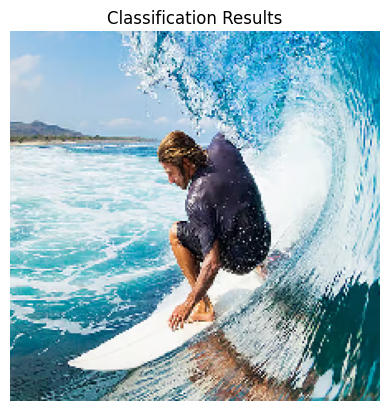

In [26]:
# 이미지, 분류 결과 시각화
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title('Classification Results')
plt.show()


In [27]:
# 분류 결과 출력
for result in results:
    print(f"Class: {result[1]}, Confidence: {result[2]:.4f}")


Class: maillot, Confidence: 0.1397
Class: killer_whale, Confidence: 0.0887
Class: swimming_trunks, Confidence: 0.0821
